### 1) Setear los datos para Los Lagos y añadir comunas
<p>Las comunas estaran como columnas
<br>0: no hay mencion
<br>1 o mas: se menciona en la noticia (text)</p>

In [209]:
import elasticsearch
from datetime import datetime

In [210]:
country="chile"
from_="2022-01-01"
to_="2022-01-31"
media_outlets=["elllanquihue","elaustral","laestrelladechiloe","elheraldoaustral","radiosago",
               "elrepuertero","elvacanudo","elhuemul","seminariolocal","elquellonino","elinsular",
               "radiopudeto","radioacogida","elcalbucano","segundos33",
               "prensadelestuario","fresiaahora","soychiloe"]

simple_keyword=False

#### Añadimos comunas de Los Lagos

In [211]:
# https://gist.github.com/juanbrujo/0fd2f4d126b3ce5a95a7dd1f28b3d8dd
comunas= ["Puerto Montt", "Calbuco", "Cochamó", "Fresia", "Frutillar", "Los Muermos", "Llanquihue", "Maullín", "Puerto Varas", "Castro", "Ancud", "Chonchi", "Curaco de Vélez", "Dalcahue", "Puqueldón", "Queilén", "Quellón", "Quemchi", "Quinchao", "Osorno", "Puerto Octay", "Purranque", "Puyehue", "Río Negro", "San Juan de la Costa", "San Pablo", "Chaitén", "Futaleufú", "Hualaihué", "Palena"]

In [212]:
IP = "search.sophia2.org"
PORT = 9200
USER= "elastic"
PASS= "dummy_elastic"

In [213]:
#NO MODIFICAR

es = elasticsearch.Elasticsearch(
    IP,
    #port=PORT,
    http_auth=(USER, PASS)
)

In [214]:
#NO MODIFICAR
query = { 
    "bool": { 
    "filter": [
        {"range": {
      "date": {
        "gte": from_,
        "lt": to_
      }
      }},

        { "term":  { "country": country }},
        { "terms":  { "media_outlet": media_outlets }} 
    ]
    }  
}

In [215]:
res = es.search(index="news", query=query, size=10000)
print("Son %d noticias encontradas..." % res['hits']['total']['value'])

Son 1311 noticias encontradas...


In [216]:
import pandas as pd

data = {'id_news':[],'country':[],'media_outlet':[],'url':[],'title':[],'text':[],'date':[]}
df = pd.DataFrame(data)  

for hit in res['hits']['hits']:
    id_news = hit['_source']['id_news']
    country = hit['_source']['country']
    media_outlet = hit['_source']['media_outlet']
    url = hit['_source']['url']
    title = hit['_source']['title']
    text = hit['_source']['text']
    date = hit['_source']['date']
    
    new_row = {'id_news':id_news, 'country':country, 'media_outlet':media_outlet, 'url':url, 'title':title, 'text':text, 'date':date}

    # si text contiene una comuna se agrega a la fila con valor de apariciones
    for comuna in comunas:
        if comuna in text:
            new_row[comuna] = text.count(comuna)
        else:
            new_row[comuna] = 0

    df = df.append(new_row, ignore_index=True)

dfComunas = df.drop_duplicates(subset='url', keep='first')

C:\Users\darko\AppData\Local\Temp\ipykernel_45796\131819932.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\darko\AppData\Local\Temp\ipykernel_45796\131819932.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\darko\AppData\Local\Temp\ipykernel_45796\131819932.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\darko\AppData\Local\Temp\ipykernel_45796\131819932.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\darko\AppDa

In [217]:
# drop duplicates
df = df.drop_duplicates(subset='url', keep='first')

# drop text less < 50 characters (possible errors)
df = df[df['text'].str.len() > 50]

print(len(df))
df.head()

1274


,id_news,country,media_outlet,url,title,text,date,Ancud,Calbuco,Castro,...,Puqueldón,Purranque,Puyehue,Queilén,Quellón,Quemchi,Quinchao,Río Negro,San Juan de la Costa,San Pablo
0,21907946.0,chile,radiosago,https://www.radiosago.cl/investigan-muerte-de-...,Investigan muerte de hombre apuñalado en Máfil...,La Fiscalía de Los Lagos dirige una investigac...,2022-01-26,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,21908053.0,chile,radiosago,https://www.radiosago.cl/ante-retroceso-a-fase...,Ante retroceso a Fase 3: Municipalidad de Puye...,Frente al alza de contagios de Covid-19 en la ...,2022-01-24,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,21908070.0,chile,radiosago,https://www.radiosago.cl/alcaldesa-de-puyehue-...,Alcaldesa de Puyehue dio positivo por covid-19,"La jefa comunal de la comuna lacustre, María J...",2022-01-23,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,21908071.0,chile,radiosago,https://www.radiosago.cl/el-primer-semestre-de...,El primer semestre de este año entrará en func...,La jefa de la División de Atención Primaria de...,2022-01-23,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,21908072.0,chile,radiosago,https://www.radiosago.cl/organizaciones-de-la-...,Organizaciones de la región de Los Lagos crean...,Como una necesidad por plantear la urgencia qu...,2022-01-24,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Guardamos como CSV, completando la pregunta 1.


In [218]:
nombre_archivo= "EneroLosLagos"+"_"+country+"_"+from_+"_"+to_+".csv"
print("El archivo se llama:")
print(nombre_archivo)
df.to_csv("./"+nombre_archivo)

El archivo se llama:
EneroLosLagos_chile_2022-01-01_2022-01-31.csv


## Pregunta 2: Analizar o descubrir tópicos

In [219]:
# General import
import spacy
from spacy.matcher import Matcher

import numpy as np
import pandas as pd

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

In [220]:
# archivo = EneroLosLagos_chile_2022-01-01_2022-01-31.csv
archivo = nombre_archivo
dataset = pd.read_csv(archivo)
dataset.head(2)
len(dataset)

1274

In [221]:
from pandasql import sqldf
# Ejemplo de consulta para una comuna con espacio, se selecciona : [Puerto Varas] y para revisar su aparición contamos con la función count
result = sqldf("SELECT media_outlet, url ,[Puerto Varas] FROM df WHERE [Puerto Varas] > 0 ORDER BY [Puerto Varas] DESC")

result

,media_outlet,url,Puerto Varas
0,elheraldoaustral,https://www.eha.cl/noticia/local/lanzan-plataf...,6.0
1,radiosago,https://www.radiosago.cl/descartan-uso-de-estu...,5.0
2,elheraldoaustral,https://www.eha.cl/noticia/deportes/en-su-debu...,5.0
3,elheraldoaustral,https://www.eha.cl/noticia/deportes/deportista...,5.0
4,elheraldoaustral,https://www.eha.cl/noticia/local/tribunal-de-g...,5.0
...,...,...,...
139,elcalbucano,https://www.elcalbucano.cl/2022/01/mas-de-600-...,1.0
140,elheraldoaustral,https://www.eha.cl/noticia/local/estudiantes-d...,1.0
141,elvacanudo,https://www.elvacanudo.cl/noticia/economia/her...,1.0
142,elheraldoaustral,https://www.eha.cl/noticia/deportes/joven-puer...,1.0


In [222]:
# Ejemplo de consulta para texto < 50 caracteres
# get text with less than 50 char
result = sqldf("SELECT media_outlet, url,text FROM df WHERE LENGTH(text) < 50")

result

,media_outlet,url,text


### Con la información cargada, la procesamos como lista

In [223]:
noticias = dataset.text.values.tolist()
noticias[0]

'La Fiscalía de Los Lagos dirige una investigación por el delito de homicidio calificado contra un imputado de 31 años que la madrugada de este miércoles fue detenido por causar la muerte a un hombre en la comuna de Máfil. La Fiscal Jefa de Los Lagos, Claudia Baeza, explicó que la muerte ocurrió en un sector de la línea férrea de Máfil, afirmando que, “por razones que se desconocen, el imputado apuñaló de forma reiterada a la víctima, tras lo cual éste fallece en el lugar a consecuencia de estas lesiones”. La Fiscal Baeza agregó que el imputado fue detenido por Carabineros luego de presentarse “voluntariamente en el consultorio de Máfil, manifestando que había matado a una persona”. La Fiscalía dispuso que la Brigada de Homicidios de la PDI realice diligencias para establecer la dinámica de los hechos e instruyó al Servicio Médico Legal que realice la autopsia para determinar la causa de la muerte. El imputado había sido condenado con anterioridad por un delito de homicidio que cometió

### Cargamos el procesamiento de lenguajes naturales (NLP) y los matcher para la estructura

In [224]:
nlp = spacy.load("es_core_news_sm")
matcher = Matcher(nlp.vocab)

# pattern: NOUN-de-NOUN
pattern_1 = [{"POS": "NOUN"},{"LOWER": "de"}, {"POS": "NOUN"}]
matcher.add("NOUN-de-NOUN", [pattern_1])

pattern_2 = [{"POS": "NOUN"}, {"POS": "ADJ"}]
matcher.add("NOUN-ADJ", [pattern_2])

### Aplicamos filtro visto en clases sobre token y palabras relevantes

In [225]:
def text_to_list(noticia):
    list_of_words = []
    
    try:
        doc = nlp(noticia)

        for token in doc:
            if (token.pos_=="NOUN"):
                list_of_words.append(token.text)

        for ent in doc.ents:
            if (ent.label_ == "PER" and " " in ent.text):
                list_of_words.append(ent.text)

        matches = matcher(doc)

        for match_id, start, end in matches:
            span = doc[start:end]  # The matched span
            list_of_words.append(span.text)
    
    except Exception as e: 
        print(noticia)
        print(e)
    
    return list_of_words

## Procesamos todas las noticias

In [226]:
noticias_procesadas = []

for index, noticia in enumerate(noticias):
    noticia_procesada = text_to_list(noticia)
    noticias_procesadas.append(noticia_procesada)

In [227]:
len(noticias_procesadas)

1274

### Prepararamos los datos de entrada de LDA
Los datos de entrada de LDA son: 
- un diccionario (variable 'id2word')
- nuestro dataset preprocesado ('noticias_procesadas')

In [228]:
# Create Dictionary
id2word = corpora.Dictionary(noticias_procesadas)
texts = noticias_procesadas

In [229]:
dataset_id = [id2word.doc2bow(noticia_procesada) for noticia_procesada in noticias_procesadas]
# View
print(dataset_id[:5])

[[(0, 1), (1, 1), (2, 1), (3, 2), (4, 1), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 2), (12, 2), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 2), (21, 2), (22, 1), (23, 4), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 3), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1)], [(7, 3), (16, 1), (32, 1), (41, 1), (42, 1), (43, 5), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 2), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 2), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 2), (73, 1), (74, 1), (75, 1), (76, 1), (77, 2), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1)], [(7, 1), (55, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 2), (101, 2), (102, 1), (103, 1), (104, 1), (105, 1), (

### Entrenamiento del modelo y selección del óptimo

In [230]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=dataset_id,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [231]:

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        print(num_topics)
        
        model = gensim.models.ldamodel.LdaModel(corpus=dataset_id,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
        
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [232]:
start=2
limit=10
step=2
print(type(id2word))

<class 'gensim.corpora.dictionary.Dictionary'>


In [233]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=dataset_id, texts=noticias_procesadas, start=start, limit=limit, step=step)

2
4
6
8


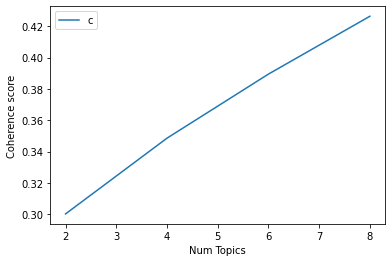

Best model so far with coherence:  0.3002901015976578  and  2  topics
Num Topics = 2  has Coherence Value of 0.3003
Best model so far with coherence:  0.348595344323835  and  4  topics
Num Topics = 4  has Coherence Value of 0.3486
Best model so far with coherence:  0.3894475133103323  and  6  topics
Num Topics = 6  has Coherence Value of 0.3894
Best model so far with coherence:  0.4263293216028343  and  8  topics
Num Topics = 8  has Coherence Value of 0.4263


In [234]:
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

# Select the optimal model and print the topics
optimal_model_coherence = -1
for m, cv in zip(x, coherence_values):
    if (cv > optimal_model_coherence):
        optimal_model_coherence = cv
        print('Best model so far with coherence: ', optimal_model_coherence, ' and ', m, ' topics')
    # Print the coherence scores
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

In [235]:
optimal_model = model_list[3]

In [236]:
print(optimal_model)

LdaModel<num_terms=25907, num_topics=8, decay=0.5, chunksize=100>


In [237]:
from pprint import pprint
pprint(optimal_model.print_topics(num_words=100))

[(0,
  '0.017*"emprendimiento" + 0.010*"naturaleza" + 0.009*"conservación" + '
  '0.008*"canal" + 0.007*"diputado" + 0.007*"obra" + 0.007*"minutos" + '
  '0.006*"tramo" + 0.005*"agrupación" + 0.005*"energía" + 0.005*"contrato" + '
  '0.004*"vicepresidente" + 0.004*"concurso" + 0.004*"mantención" + '
  '0.004*"salida" + 0.004*"función" + 0.004*"sumideros" + 0.004*"distrito" + '
  '0.004*"partido" + 0.004*"sociedad civil" + 0.004*"cuenca" + 0.004*"trabajo" '
  '+ 0.003*"aplicación" + 0.003*"fútbol" + 0.003*"parlamentario" + '
  '0.003*"mesas" + 0.003*"puente" + 0.003*"turberas" + 0.003*"premio" + '
  '0.003*"Gaspar Domínguez" + 0.003*"agricultura" + 0.003*"construcción" + '
  '0.003*"pobreza" + 0.002*"pasión" + 0.002*"trabajador" + 0.002*"ciudadanas" '
  '+ 0.002*"suministro" + 0.002*"oficio" + 0.002*"fabricación" + '
  '0.002*"programación" + 0.002*"descarga" + 0.002*"finalistas" + '
  '0.002*"jurado" + 0.002*"testimonio" + 0.002*"académicos" + '
  '0.002*"escultura" + 0.002*"empresas n

### Visualización de los tópicos

In [238]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(optimal_model, dataset_id, id2word)
vis

c:\Users\darko\Miniconda3\envs\myenv\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.301240 -0.005636       1        1  45.102071
5     -0.164202  0.107062       2        1  18.110578
2     -0.005793 -0.291123       3        1  14.263895
1     -0.017494  0.063347       4        1   9.482660
7      0.097342  0.039731       5        1   5.330734
0      0.144804  0.032857       6        1   3.486634
6      0.125481  0.038279       7        1   3.162306
3      0.121102  0.015483       8        1   1.061122, topic_info=                 Term        Freq       Total Category  logprob  loglift
963          proyecto  434.000000  434.000000  Default  30.0000  30.0000
56              casos  186.000000  186.000000  Default  29.0000  29.0000
74           personas  803.000000  803.000000  Default  28.0000  28.0000
1682             agua  305.000000  305.000000  Default  27.0000  27.0000
168            región  463.000000  463.000000  Default  26.0000  26.0000
...               ...         ...         ...      ...      ...      ...
2678      gastronomía    2.943028   10.747138   Topic8  -6.1483   3.2506
501         denuncias    4.636510   37.475116   Topic8  -5.6938   2.4561
3220  Francisco Muñoz    2.052413    4.452056   Topic8  -6.5087   3.7715
2236         promedio    3.083115   59.110359   Topic8  -6.1018   1.5924
1000        temporada    1.919670   56.773964   Topic8  -6.5756   1.1589

[413 rows x 6 columns], token_table=       Topic      Freq             Term
term                                   
1011       4  0.978625    Carlos Geisse
2988       7  0.908186       Detectives
10183      7  0.951794      Estudiantes
3220       4  0.449231  Francisco Muñoz
3220       8  0.449231  Francisco Muñoz
...      ...       ...              ...
185        4  0.107315             zona
3295       1  0.292210            áreas
3295       3  0.639210            áreas
3295       5  0.063921            áreas
4906       5  0.982855           órgano

[557 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 6, 3, 2, 8, 1, 7, 4])

### Temas principales

In [239]:
def format_topics_documents(ldamodel=None, corpus=dataset_id, texts=texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['dominant_Topic', 'perc_Contribution', 'topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_documents(ldamodel=optimal_model, corpus=dataset_id, texts=noticias)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['document_No', 'dominant_Topic', 'topic_Perc_Contrib', 'keywords', 'text']
df_dominant_topic.head(10)

C:\Users\darko\AppData\Local\Temp\ipykernel_45796\1089659363.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\darko\AppData\Local\Temp\ipykernel_45796\1089659363.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)


,document_No,dominant_Topic,topic_Perc_Contrib,keywords,text
0,0,4,0.9553,"personas, años, año, comuna, parte, proceso, e...",La Fiscalía de Los Lagos dirige una investigac...
1,1,4,0.9614,"personas, años, año, comuna, parte, proceso, e...",Frente al alza de contagios de Covid-19 en la ...
2,2,4,0.5943,"personas, años, año, comuna, parte, proceso, e...","La jefa comunal de la comuna lacustre, María J..."
3,3,4,0.8474,"personas, años, año, comuna, parte, proceso, e...",La jefa de la División de Atención Primaria de...
4,4,0,0.5230,"emprendimiento, naturaleza, conservación, cana...",Como una necesidad por plantear la urgencia qu...
5,5,7,0.5803,"presidente, iniciativas, región, firmas, negoc...",Un llamado de emergencia la madrugada de este ...
6,6,6,0.8510,"casos, virus, ingresos, región, drogas, armas,...",Así lo confirmó la autoridad sanitaria detalla...
7,7,4,0.5131,"personas, años, año, comuna, parte, proceso, e...",La jornada del sábado se realizó la audiencia ...
8,8,2,0.5074,"zona, desarrollo, turismo, productos, informac...",Luego que durante la semana pasada se diera a ...
9,9,6,0.8543,"casos, virus, ingresos, región, drogas, armas,...",Así lo confirmó la autoridad sanitaria detalla...


In [240]:
# add comuna to dataframe df_dominant_topic using merge
df_dominant_topic = pd.merge(df_dominant_topic, df)

## Pregunta 3: Revisar por comunas los tópicos más relevantes

In [241]:
df_dominant_topic.head(2)

,document_No,dominant_Topic,topic_Perc_Contrib,keywords,text,id_news,country,media_outlet,url,title,...,Puqueldón,Purranque,Puyehue,Queilén,Quellón,Quemchi,Quinchao,Río Negro,San Juan de la Costa,San Pablo
0,0,4,0.9553,"personas, años, año, comuna, parte, proceso, e...",La Fiscalía de Los Lagos dirige una investigac...,21907946.0,chile,radiosago,https://www.radiosago.cl/investigan-muerte-de-...,Investigan muerte de hombre apuñalado en Máfil...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,4,0.9614,"personas, años, año, comuna, parte, proceso, e...",Frente al alza de contagios de Covid-19 en la ...,21908053.0,chile,radiosago,https://www.radiosago.cl/ante-retroceso-a-fase...,Ante retroceso a Fase 3: Municipalidad de Puye...,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


### Ejemplo breve revisión Purranque
<p>Creamos un dataframe especial para los datos de Purranque y no estar filtrando a cada rato los datos</p>

In [248]:
#filter by comuna > 0 
df_Purranque = df_dominant_topic.loc[df_dominant_topic['Purranque'] > 0]
print(f'Total de documentos en las que se hace mención a Purranque: {len(df_Purranque)}')
df_Purranque.head(5)

Total de documentos en las que se hace mención a Purranque: 38


,document_No,dominant_Topic,topic_Perc_Contrib,keywords,text,id_news,country,media_outlet,url,title,...,Puqueldón,Purranque,Puyehue,Queilén,Quellón,Quemchi,Quinchao,Río Negro,San Juan de la Costa,San Pablo
9,9,6,0.8543,"casos, virus, ingresos, región, drogas, armas,...",Así lo confirmó la autoridad sanitaria detalla...,21908078.0,chile,radiosago,https://www.radiosago.cl/432-contagios-de-covi...,432 contagios de covid-19 se reportaron este d...,...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
16,16,6,0.8570,"casos, virus, ingresos, región, drogas, armas,...",La mayor cantidad de nuevos contagios se repor...,21908160.0,chile,radiosago,https://www.radiosago.cl/302-nuevos-contagios-...,302 nuevos contagios de covid-19 se reportaron...,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
20,20,6,0.8520,"casos, virus, ingresos, región, drogas, armas,...",La mayor cantidad de nuevos contagios se repor...,21908202.0,chile,radiosago,https://www.radiosago.cl/154-nuevos-contagios-...,154 nuevos contagios de covid-19 se reportaron...,...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
21,21,6,0.8510,"casos, virus, ingresos, región, drogas, armas,...",Así lo confirmó la autoridad sanitaria detalla...,21908203.0,chile,radiosago,https://www.radiosago.cl/387-contagios-y-2-fal...,387 contagios y 2 fallecidos dejó el covid-19 ...,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
31,31,6,0.8311,"casos, virus, ingresos, región, drogas, armas,...",La mayor cantidad de nuevos contagios se repor...,21908244.0,chile,radiosago,https://www.radiosago.cl/178-contagios-y-5-dec...,178 contagios y 5 decesos dejó el covid-19 est...,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0


### Podemos realizar consultas sobre Purranque
<p>En este caso nos quedamos con casi toda la información pero quitamos el resto de comunas, podríamos dejarlas para ver el hecho de que si un medio menciona a 'Purranque' también mencione otra comuna</p>

In [252]:
# sqldf query
result_Purranque = sqldf("SELECT document_No, dominant_Topic, topic_Perc_Contrib, keywords, text, id_news, media_outlet, url, title, Purranque FROM df_Purranque")
result_Purranque

,document_No,dominant_Topic,topic_Perc_Contrib,keywords,text,id_news,media_outlet,url,title,Purranque
0,9,6,0.8543,"casos, virus, ingresos, región, drogas, armas,...",Así lo confirmó la autoridad sanitaria detalla...,21908078.0,radiosago,https://www.radiosago.cl/432-contagios-de-covi...,432 contagios de covid-19 se reportaron este d...,1.0
1,16,6,0.8570,"casos, virus, ingresos, región, drogas, armas,...",La mayor cantidad de nuevos contagios se repor...,21908160.0,radiosago,https://www.radiosago.cl/302-nuevos-contagios-...,302 nuevos contagios de covid-19 se reportaron...,1.0
2,20,6,0.8520,"casos, virus, ingresos, región, drogas, armas,...",La mayor cantidad de nuevos contagios se repor...,21908202.0,radiosago,https://www.radiosago.cl/154-nuevos-contagios-...,154 nuevos contagios de covid-19 se reportaron...,1.0
3,21,6,0.8510,"casos, virus, ingresos, región, drogas, armas,...",Así lo confirmó la autoridad sanitaria detalla...,21908203.0,radiosago,https://www.radiosago.cl/387-contagios-y-2-fal...,387 contagios y 2 fallecidos dejó el covid-19 ...,1.0
4,31,6,0.8311,"casos, virus, ingresos, región, drogas, armas,...",La mayor cantidad de nuevos contagios se repor...,21908244.0,radiosago,https://www.radiosago.cl/178-contagios-y-5-dec...,178 contagios y 5 decesos dejó el covid-19 est...,1.0
5,50,4,0.9633,"personas, años, año, comuna, parte, proceso, e...",La Municipalidad de Purranque se encuentra afi...,21908543.0,radiosago,https://www.radiosago.cl/municipio-de-purranqu...,Municipio de Purranque coordina actividades de...,2.0
6,56,6,0.8358,"casos, virus, ingresos, región, drogas, armas,...",Así lo confirmó la autoridad sanitaria detalla...,21908558.0,radiosago,https://www.radiosago.cl/140-contagios-de-covi...,140 contagios de covid-19 se reportaron este j...,1.0
7,57,6,0.8445,"casos, virus, ingresos, región, drogas, armas,...",Así lo confirmó la autoridad sanitaria detalla...,21908559.0,radiosago,https://www.radiosago.cl/145-contagios-de-covi...,145 contagios de covid-19 se reportaron este v...,1.0
8,86,6,0.4986,"casos, virus, ingresos, región, drogas, armas,...","La Fiscalía local de Osorno, tras un proceso d...",21827081.0,radiosago,https://www.radiosago.cl/detienen-a-sujeto-que...,Detienen a sujeto que abastecía de droga a mic...,1.0
9,93,4,0.9010,"personas, años, año, comuna, parte, proceso, e...",Dos celebraciones católicas que movilizan año ...,21827211.0,radiosago,https://www.radiosago.cl/celebraran-fiestas-ca...,Celebrarán fiestas católicas de San Sebastián ...,1.0


### Podemos ordenar en base al tópico más recurrente
<p>En este caso el tópico 4 y 6 son los más recurrentes</p>

In [269]:
result_Purranque = sqldf("SELECT count(*) , document_No, dominant_Topic, topic_Perc_Contrib, keywords FROM df_Purranque GROUP BY dominant_Topic Order by count(*) desc")
# display keywords
print(f"Tópico más recurrente: {result_Purranque['keywords'][0]}")
print(f"Segundo tópico más recurrente: {result_Purranque['keywords'][1]}")
display(result_Purranque)

Tópico más recurrente: personas, años, año, comuna, parte, proceso, enero, comunidad, actividades, través
Segundo tópico más recurrente: casos, virus, ingresos, región, drogas, armas, contagio, curso, personas, misión


,count(*),document_No,dominant_Topic,topic_Perc_Contrib,keywords
0,15,50,4,0.9633,"personas, años, año, comuna, parte, proceso, e..."
1,12,9,6,0.8543,"casos, virus, ingresos, región, drogas, armas,..."
2,7,155,5,0.7045,"proyecto, agua, vez, millones, empresa, empres..."
3,3,558,1,0.5779,"vecinos, familias, beneficios, programa, traba..."
4,1,1155,7,0.4501,"presidente, iniciativas, región, firmas, negoc..."


## Podemos generalizar esta información para cada comuna

In [278]:
for comuna in comunas:
    df_temp = df_dominant_topic.loc[df_dominant_topic[comuna] > 0]
    print(comuna)
    # query topico más recurrente
    result_comuna = sqldf("SELECT count(*) , document_No, dominant_Topic, topic_Perc_Contrib, keywords, ["+comuna+"] FROM df_temp GROUP BY dominant_Topic Order by count(*) desc")

    # display topics
    print(f"Tópico más recurrente: {result_comuna['keywords'][0]}")
    # Display 3 tópicos más frecuentes
    display(result_comuna.head(3))


Puerto Montt
Tópico más recurrente: personas, años, año, comuna, parte, proceso, enero, comunidad, actividades, través


,count(*),document_No,dominant_Topic,topic_Perc_Contrib,keywords,Puerto Montt
0,168,15,4,0.9288,"personas, años, año, comuna, parte, proceso, e...",1.0
1,26,6,6,0.8510,"casos, virus, ingresos, región, drogas, armas,...",2.0
2,13,287,2,0.4185,"zona, desarrollo, turismo, productos, informac...",4.0


Calbuco
Tópico más recurrente: personas, años, año, comuna, parte, proceso, enero, comunidad, actividades, través


,count(*),document_No,dominant_Topic,topic_Perc_Contrib,keywords,Calbuco
0,28,7,4,0.5131,"personas, años, año, comuna, parte, proceso, e...",4.0
1,19,6,6,0.8510,"casos, virus, ingresos, región, drogas, armas,...",1.0
2,9,28,7,0.5157,"presidente, iniciativas, región, firmas, negoc...",1.0


Cochamó
Tópico más recurrente: personas, años, año, comuna, parte, proceso, enero, comunidad, actividades, través


,count(*),document_No,dominant_Topic,topic_Perc_Contrib,keywords,Cochamó
0,16,18,4,0.4538,"personas, años, año, comuna, parte, proceso, e...",1.0
1,5,280,7,0.7164,"presidente, iniciativas, región, firmas, negoc...",1.0
2,5,21,6,0.8510,"casos, virus, ingresos, región, drogas, armas,...",1.0


Fresia
Tópico más recurrente: personas, años, año, comuna, parte, proceso, enero, comunidad, actividades, través


,count(*),document_No,dominant_Topic,topic_Perc_Contrib,keywords,Fresia
0,17,3,4,0.8474,"personas, años, año, comuna, parte, proceso, e...",2.0
1,16,6,6,0.8510,"casos, virus, ingresos, región, drogas, armas,...",1.0
2,6,28,7,0.5157,"presidente, iniciativas, región, firmas, negoc...",2.0


Frutillar
Tópico más recurrente: personas, años, año, comuna, parte, proceso, enero, comunidad, actividades, través


,count(*),document_No,dominant_Topic,topic_Perc_Contrib,keywords,Frutillar
0,21,150,4,0.7648,"personas, años, año, comuna, parte, proceso, e...",1.0
1,20,6,6,0.8510,"casos, virus, ingresos, región, drogas, armas,...",1.0
2,7,5,7,0.5803,"presidente, iniciativas, región, firmas, negoc...",3.0


Los Muermos
Tópico más recurrente: casos, virus, ingresos, región, drogas, armas, contagio, curso, personas, misión


,count(*),document_No,dominant_Topic,topic_Perc_Contrib,keywords,Los Muermos
0,11,6,6,0.8510,"casos, virus, ingresos, región, drogas, armas,...",1.0
1,6,160,4,0.7645,"personas, años, año, comuna, parte, proceso, e...",1.0
2,4,558,1,0.5779,"vecinos, familias, beneficios, programa, traba...",2.0


Llanquihue
Tópico más recurrente: personas, años, año, comuna, parte, proceso, enero, comunidad, actividades, través


,count(*),document_No,dominant_Topic,topic_Perc_Contrib,keywords,Llanquihue
0,35,47,4,0.9316,"personas, años, año, comuna, parte, proceso, e...",2.0
1,20,6,6,0.8510,"casos, virus, ingresos, región, drogas, armas,...",2.0
2,16,14,2,0.7922,"zona, desarrollo, turismo, productos, informac...",1.0


Maullín
Tópico más recurrente: casos, virus, ingresos, región, drogas, armas, contagio, curso, personas, misión


,count(*),document_No,dominant_Topic,topic_Perc_Contrib,keywords,Maullín
0,12,6,6,0.8510,"casos, virus, ingresos, región, drogas, armas,...",1.0
1,12,176,5,0.4093,"proyecto, agua, vez, millones, empresa, empres...",1.0
2,10,28,7,0.5157,"presidente, iniciativas, región, firmas, negoc...",3.0


Puerto Varas
Tópico más recurrente: personas, años, año, comuna, parte, proceso, enero, comunidad, actividades, través


,count(*),document_No,dominant_Topic,topic_Perc_Contrib,keywords,Puerto Varas
0,74,22,4,0.3406,"personas, años, año, comuna, parte, proceso, e...",1.0
1,21,6,6,0.8510,"casos, virus, ingresos, región, drogas, armas,...",2.0
2,18,37,2,0.6577,"zona, desarrollo, turismo, productos, informac...",3.0


Castro
Tópico más recurrente: personas, años, año, comuna, parte, proceso, enero, comunidad, actividades, través


,count(*),document_No,dominant_Topic,topic_Perc_Contrib,keywords,Castro
0,83,12,4,0.8385,"personas, años, año, comuna, parte, proceso, e...",2.0
1,23,6,6,0.8510,"casos, virus, ingresos, región, drogas, armas,...",1.0
2,13,280,7,0.7164,"presidente, iniciativas, región, firmas, negoc...",1.0


Ancud
Tópico más recurrente: personas, años, año, comuna, parte, proceso, enero, comunidad, actividades, través


,count(*),document_No,dominant_Topic,topic_Perc_Contrib,keywords,Ancud
0,40,45,4,0.6520,"personas, años, año, comuna, parte, proceso, e...",1.0
1,17,6,6,0.8510,"casos, virus, ingresos, región, drogas, armas,...",1.0
2,9,147,5,0.3873,"proyecto, agua, vez, millones, empresa, empres...",3.0


Chonchi
Tópico más recurrente: casos, virus, ingresos, región, drogas, armas, contagio, curso, personas, misión


,count(*),document_No,dominant_Topic,topic_Perc_Contrib,keywords,Chonchi
0,15,6,6,0.8510,"casos, virus, ingresos, región, drogas, armas,...",2.0
1,11,160,4,0.7645,"personas, años, año, comuna, parte, proceso, e...",1.0
2,2,1125,2,0.6571,"zona, desarrollo, turismo, productos, informac...",1.0


Curaco de Vélez
Tópico más recurrente: personas, años, año, comuna, parte, proceso, enero, comunidad, actividades, través


,count(*),document_No,dominant_Topic,topic_Perc_Contrib,keywords,Curaco de Vélez
0,13,548,4,0.4013,"personas, años, año, comuna, parte, proceso, e...",1.0
1,7,6,6,0.8510,"casos, virus, ingresos, región, drogas, armas,...",1.0
2,2,806,2,0.5413,"zona, desarrollo, turismo, productos, informac...",5.0


Dalcahue
Tópico más recurrente: personas, años, año, comuna, parte, proceso, enero, comunidad, actividades, través


,count(*),document_No,dominant_Topic,topic_Perc_Contrib,keywords,Dalcahue
0,22,150,4,0.7648,"personas, años, año, comuna, parte, proceso, e...",1.0
1,12,6,6,0.8510,"casos, virus, ingresos, región, drogas, armas,...",1.0
2,2,990,7,0.4299,"presidente, iniciativas, región, firmas, negoc...",2.0


Puqueldón
Tópico más recurrente: personas, años, año, comuna, parte, proceso, enero, comunidad, actividades, través


,count(*),document_No,dominant_Topic,topic_Perc_Contrib,keywords,Puqueldón
0,8,150,4,0.7648,"personas, años, año, comuna, parte, proceso, e...",1.0
1,4,9,6,0.8543,"casos, virus, ingresos, región, drogas, armas,...",1.0


Queilén
Tópico más recurrente: personas, años, año, comuna, parte, proceso, enero, comunidad, actividades, través


,count(*),document_No,dominant_Topic,topic_Perc_Contrib,keywords,Queilén
0,2,458,4,0.5913,"personas, años, año, comuna, parte, proceso, e...",1.0


Quellón
Tópico más recurrente: personas, años, año, comuna, parte, proceso, enero, comunidad, actividades, través


,count(*),document_No,dominant_Topic,topic_Perc_Contrib,keywords,Quellón
0,26,160,4,0.7645,"personas, años, año, comuna, parte, proceso, e...",1.0
1,23,6,6,0.8510,"casos, virus, ingresos, región, drogas, armas,...",1.0
2,3,251,2,0.6866,"zona, desarrollo, turismo, productos, informac...",1.0


Quemchi
Tópico más recurrente: casos, virus, ingresos, región, drogas, armas, contagio, curso, personas, misión


,count(*),document_No,dominant_Topic,topic_Perc_Contrib,keywords,Quemchi
0,15,6,6,0.8510,"casos, virus, ingresos, región, drogas, armas,...",1.0
1,8,458,4,0.5913,"personas, años, año, comuna, parte, proceso, e...",1.0
2,3,558,1,0.5779,"vecinos, familias, beneficios, programa, traba...",2.0


Quinchao
Tópico más recurrente: personas, años, año, comuna, parte, proceso, enero, comunidad, actividades, través


,count(*),document_No,dominant_Topic,topic_Perc_Contrib,keywords,Quinchao
0,26,15,4,0.9288,"personas, años, año, comuna, parte, proceso, e...",1.0
1,12,6,6,0.8510,"casos, virus, ingresos, región, drogas, armas,...",1.0
2,1,990,7,0.4299,"presidente, iniciativas, región, firmas, negoc...",1.0


Osorno
Tópico más recurrente: personas, años, año, comuna, parte, proceso, enero, comunidad, actividades, través


,count(*),document_No,dominant_Topic,topic_Perc_Contrib,keywords,Osorno
0,114,18,4,0.4538,"personas, años, año, comuna, parte, proceso, e...",2.0
1,31,6,6,0.8510,"casos, virus, ingresos, región, drogas, armas,...",2.0
2,20,65,5,0.5361,"proyecto, agua, vez, millones, empresa, empres...",3.0


Puerto Octay
Tópico más recurrente: casos, virus, ingresos, región, drogas, armas, contagio, curso, personas, misión


,count(*),document_No,dominant_Topic,topic_Perc_Contrib,keywords,Puerto Octay
0,14,6,6,0.8510,"casos, virus, ingresos, región, drogas, armas,...",1.0
1,11,1,4,0.9614,"personas, años, año, comuna, parte, proceso, e...",1.0
2,5,367,2,0.4919,"zona, desarrollo, turismo, productos, informac...",1.0


Purranque
Tópico más recurrente: personas, años, año, comuna, parte, proceso, enero, comunidad, actividades, través


,count(*),document_No,dominant_Topic,topic_Perc_Contrib,keywords,Purranque
0,15,50,4,0.9633,"personas, años, año, comuna, parte, proceso, e...",2.0
1,12,9,6,0.8543,"casos, virus, ingresos, región, drogas, armas,...",1.0
2,7,155,5,0.7045,"proyecto, agua, vez, millones, empresa, empres...",1.0


Puyehue
Tópico más recurrente: casos, virus, ingresos, región, drogas, armas, contagio, curso, personas, misión


,count(*),document_No,dominant_Topic,topic_Perc_Contrib,keywords,Puyehue
0,12,6,6,0.8510,"casos, virus, ingresos, región, drogas, armas,...",1.0
1,9,1,4,0.9614,"personas, años, año, comuna, parte, proceso, e...",1.0
2,5,36,5,0.8822,"proyecto, agua, vez, millones, empresa, empres...",2.0


Río Negro
Tópico más recurrente: casos, virus, ingresos, región, drogas, armas, contagio, curso, personas, misión


,count(*),document_No,dominant_Topic,topic_Perc_Contrib,keywords,Río Negro
0,15,6,6,0.8510,"casos, virus, ingresos, región, drogas, armas,...",1.0
1,7,1,4,0.9614,"personas, años, año, comuna, parte, proceso, e...",1.0
2,3,751,5,0.5818,"proyecto, agua, vez, millones, empresa, empres...",2.0


San Juan de la Costa
Tópico más recurrente: personas, años, año, comuna, parte, proceso, enero, comunidad, actividades, través


,count(*),document_No,dominant_Topic,topic_Perc_Contrib,keywords,San Juan de la Costa
0,6,1,4,0.9614,"personas, años, año, comuna, parte, proceso, e...",1.0
1,5,6,6,0.8510,"casos, virus, ingresos, región, drogas, armas,...",1.0
2,3,74,5,0.4904,"proyecto, agua, vez, millones, empresa, empres...",1.0


San Pablo
Tópico más recurrente: casos, virus, ingresos, región, drogas, armas, contagio, curso, personas, misión


,count(*),document_No,dominant_Topic,topic_Perc_Contrib,keywords,San Pablo
0,12,6,6,0.8510,"casos, virus, ingresos, región, drogas, armas,...",1.0
1,5,93,4,0.9010,"personas, años, año, comuna, parte, proceso, e...",1.0
2,4,74,5,0.4904,"proyecto, agua, vez, millones, empresa, empres...",1.0


Chaitén
Tópico más recurrente: personas, años, año, comuna, parte, proceso, enero, comunidad, actividades, través


,count(*),document_No,dominant_Topic,topic_Perc_Contrib,keywords,Chaitén
0,13,136,4,0.3543,"personas, años, año, comuna, parte, proceso, e...",2.0
1,8,6,6,0.8510,"casos, virus, ingresos, región, drogas, armas,...",1.0
2,6,28,7,0.5157,"presidente, iniciativas, región, firmas, negoc...",1.0


Futaleufú
Tópico más recurrente: personas, años, año, comuna, parte, proceso, enero, comunidad, actividades, través


,count(*),document_No,dominant_Topic,topic_Perc_Contrib,keywords,Futaleufú
0,11,458,4,0.5913,"personas, años, año, comuna, parte, proceso, e...",1.0
1,9,636,2,0.6116,"zona, desarrollo, turismo, productos, informac...",1.0
2,6,43,1,0.6445,"vecinos, familias, beneficios, programa, traba...",4.0


Hualaihué
Tópico más recurrente: casos, virus, ingresos, región, drogas, armas, contagio, curso, personas, misión


,count(*),document_No,dominant_Topic,topic_Perc_Contrib,keywords,Hualaihué
0,12,9,6,0.8543,"casos, virus, ingresos, región, drogas, armas,...",1.0
1,6,160,4,0.7645,"personas, años, año, comuna, parte, proceso, e...",1.0
2,5,473,2,0.7385,"zona, desarrollo, turismo, productos, informac...",1.0


Palena
Tópico más recurrente: casos, virus, ingresos, región, drogas, armas, contagio, curso, personas, misión


,count(*),document_No,dominant_Topic,topic_Perc_Contrib,keywords,Palena
0,20,6,6,0.8510,"casos, virus, ingresos, región, drogas, armas,...",2.0
1,19,47,4,0.9316,"personas, años, año, comuna, parte, proceso, e...",3.0
2,8,419,1,0.3257,"vecinos, familias, beneficios, programa, traba...",1.0
